In [1]:
library(phytools)
library(paleotree)
library(caper)
library(bestNormalize)

Loading required package: ape
Loading required package: maps
Loading required package: MASS
Loading required package: mvtnorm

Attaching package: ‘bestNormalize’

The following object is masked from ‘package:MASS’:

    boxcox



In [2]:
t <- read.tree("silva.nwk")
# dropping zero-length terminal branches and collapse internal zero-length branches
nt <- di2multi(dropZLB(t))
df <- read.csv("TableS1_IntronPerKb_Annotation.csv")
tip <- as.data.frame(nt$tip.label)
names(tip) <- 'genome'
# creating new table
d <- merge(df, tip, by='genome')

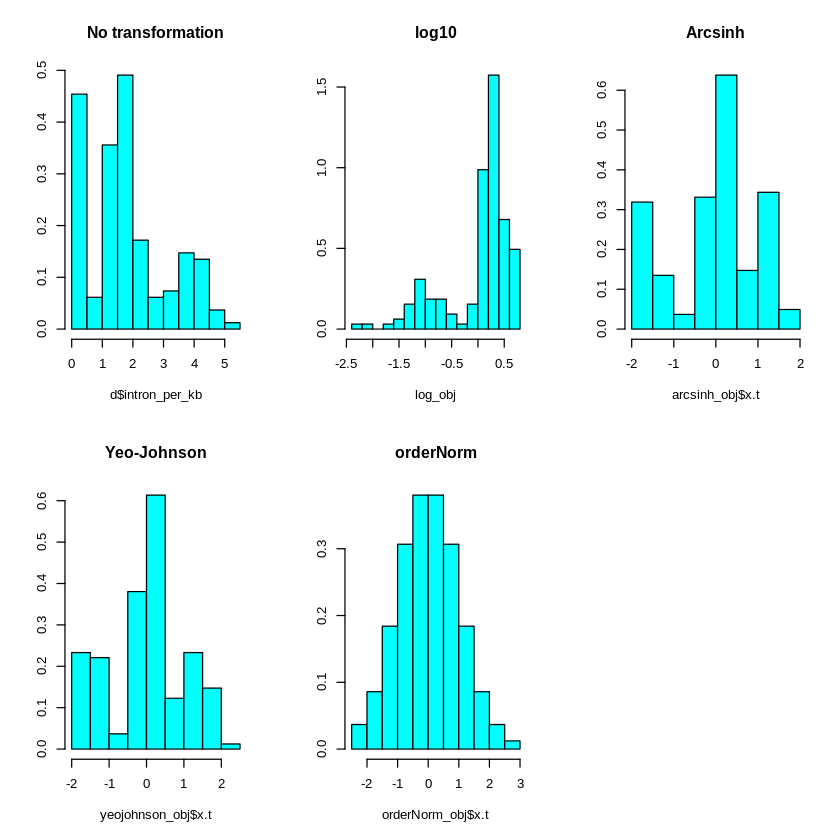

In [3]:
# trying different transformations
# intron_per_kb
log_obj <- log10(d$intron_per_kb)
arcsinh_obj <- arcsinh_x(d$intron_per_kb)
# boxcox_obj <- boxcox(d$intron_per_kb)
yeojohnson_obj <- yeojohnson(d$intron_per_kb)
orderNorm_obj <- orderNorm(d$intron_per_kb)
par(mfrow = c(2,3))
MASS::truehist(d$intron_per_kb, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
# MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”

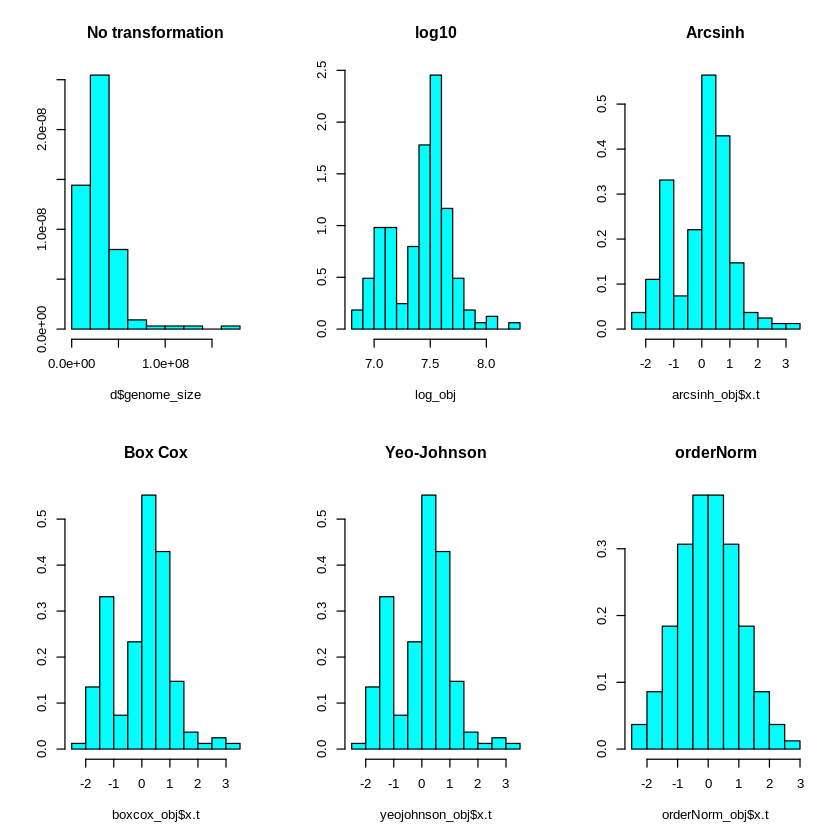

In [4]:
# genome_size
log_obj <- log10(d$genome_size)
arcsinh_obj <- arcsinh_x(d$genome_size)
boxcox_obj <- boxcox(d$genome_size)
yeojohnson_obj <- yeojohnson(d$genome_size)
orderNorm_obj <- orderNorm(d$genome_size)
par(mfrow = c(2,3))
MASS::truehist(d$genome_size, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

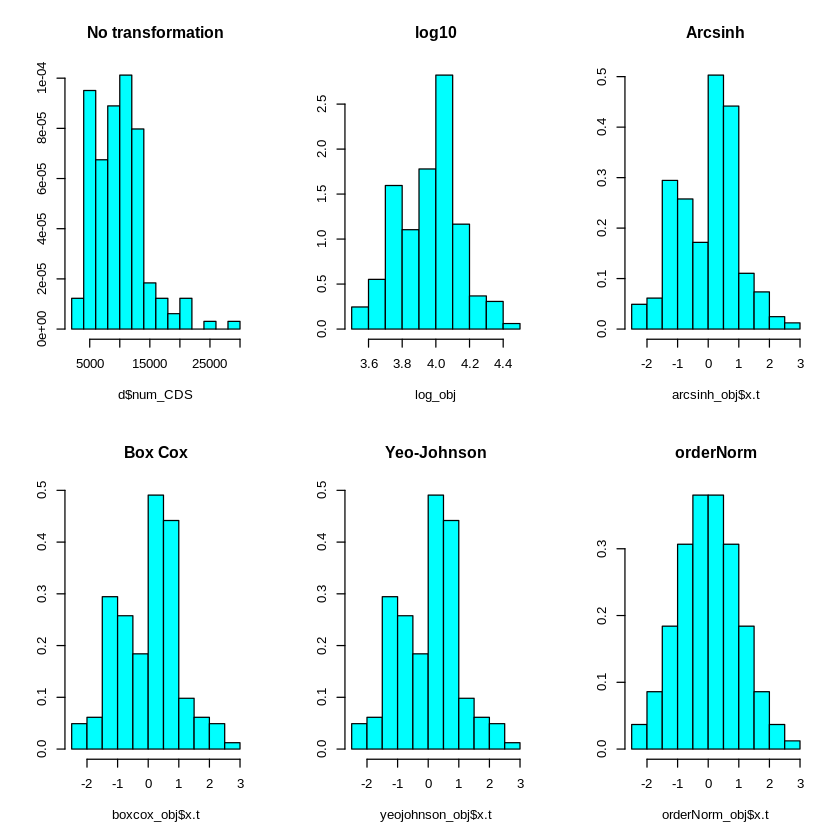

In [5]:
# num_CDS
log_obj <- log10(d$num_CDS)
arcsinh_obj <- arcsinh_x(d$num_CDS)
boxcox_obj <- boxcox(d$num_CDS)
yeojohnson_obj <- yeojohnson(d$num_CDS)
orderNorm_obj <- orderNorm(d$num_CDS)
par(mfrow = c(2,3))
MASS::truehist(d$num_CDS, main = "No transformation", nbins = 12)
MASS::truehist(log_obj, main = "log10", nbins = 12)
MASS::truehist(arcsinh_obj$x.t, main = "Arcsinh", nbins = 12)
MASS::truehist(boxcox_obj$x.t, main = "Box Cox", nbins = 12)
MASS::truehist(yeojohnson_obj$x.t, main = "Yeo-Johnson", nbins = 12)
MASS::truehist(orderNorm_obj$x.t, main = "orderNorm", nbins = 12)

In [6]:
# orderNorm Transformation
d$on_genome_size <- (orderNorm(d$genome_size))$x.t
d$on_intron_per_kb <- (orderNorm(d$intron_per_kb))$x.t
d$on_num_CDS <- (orderNorm(d$num_CDS))$x.t
intron <- comparative.data(nt, d, genome)

Warning message in caic.diagnostics(crunchMod, outlier = 1):
“Plots of absolute contrasts against node ages requested where node ages are not available.
  The tree may not be ultrametric, or the tolerance may need to be adjusted.”


Excluding 4 contrasts with absolute studentised residuals > 3

on_intron_per_kb :
   Estimate Std. Error t value  Pr(>|t|)    
NV  0.18872    0.19742  0.9560 0.3408053    
SD -5.64142    1.63080 -3.4593 0.0007252 ***

on_num_CDS :
    Estimate Std. Error t value Pr(>|t|)
NV  0.067923   0.453647  0.1497   0.8812
SD -1.640722   3.729530 -0.4399   0.6607

---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

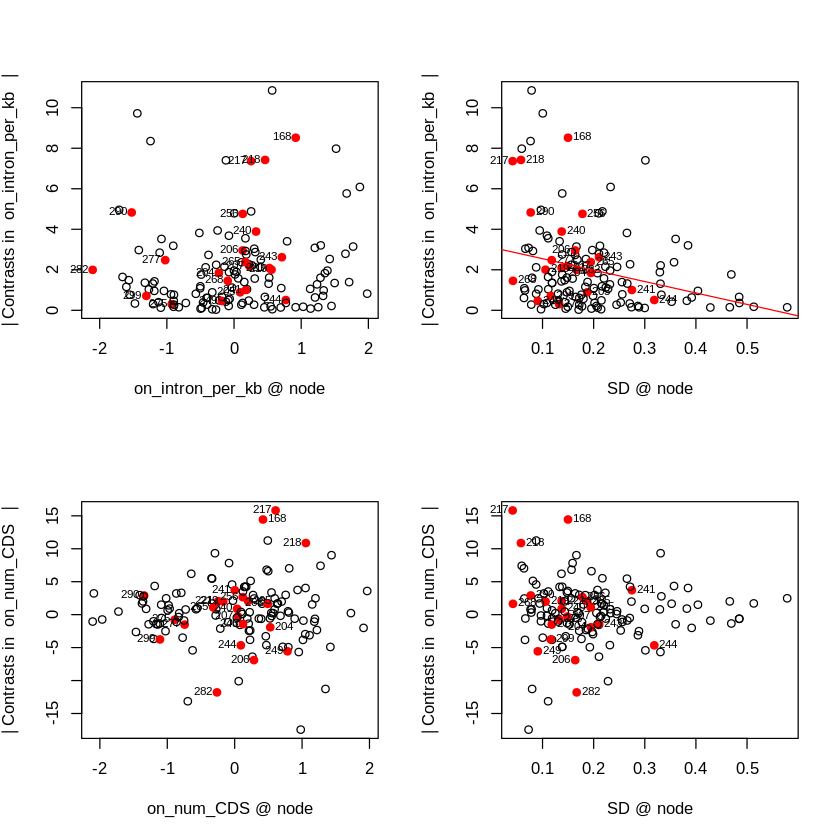

In [7]:
# phylogenetic independent contrasts
par(mfrow=c(2,2))
fit3 <- crunch(on_genome_size ~ on_intron_per_kb + on_num_CDS, data=intron)
crunchMod <- caic.robust(fit3)
caic.diagnostics(crunchMod, outlier=1)
# a significant relationship between absolute values of standardized contrasts 
# and the estimated standard deviation was obtained

Warning message in caic.diagnostics(crunchMod):
“Plots of absolute contrasts against node ages requested where node ages are not available.
  The tree may not be ultrametric, or the tolerance may need to be adjusted.”


Excluding 26 contrasts with absolute studentised residuals > 1

on_intron_per_kb :
   Estimate Std. Error t value Pr(>|t|)   
NV  0.12849    0.20250  0.6345 0.527018   
SD -4.53849    1.67552 -2.7087 0.007806 **

on_num_CDS :
   Estimate Std. Error t value Pr(>|t|)
NV -0.18406    0.42980 -0.4282   0.6693
SD  1.05535    3.60187  0.2930   0.7701

---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

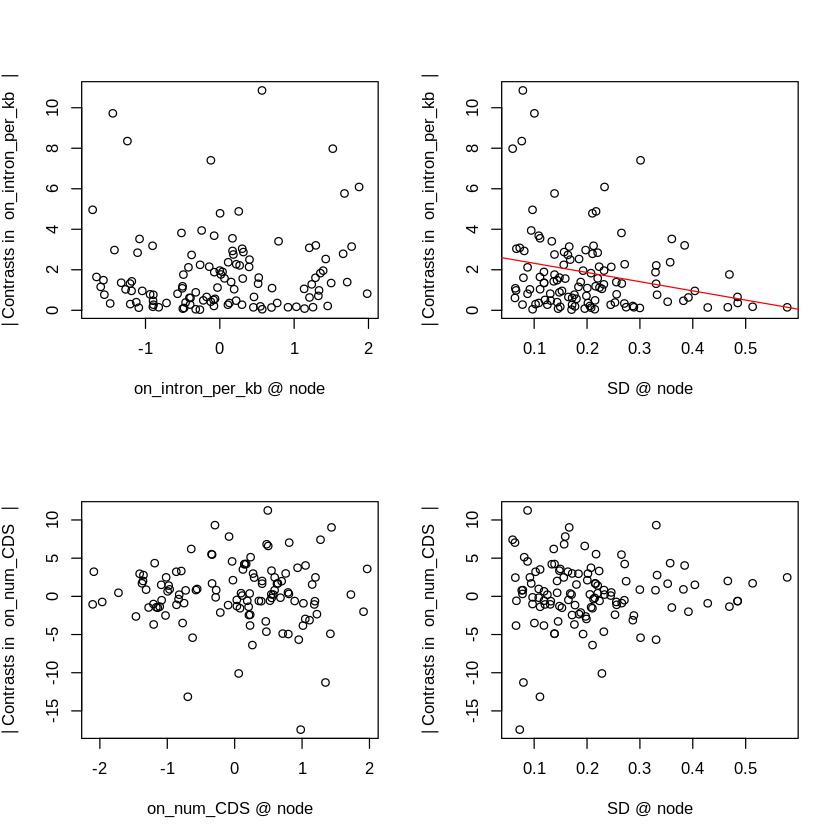

In [8]:
par(mfrow=c(2,2))
crunchMod <- caic.robust(fit3, robust=1)
caic.diagnostics(crunchMod)
# removing outliers (the above red points) using a threshold of 1 
# for the absolute studentised residuals

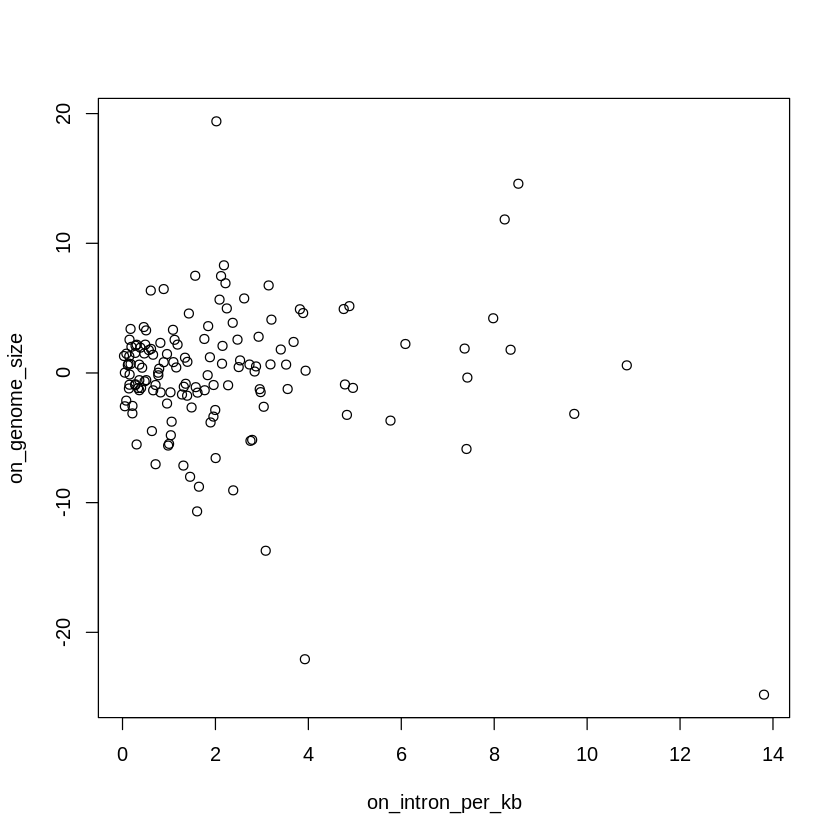

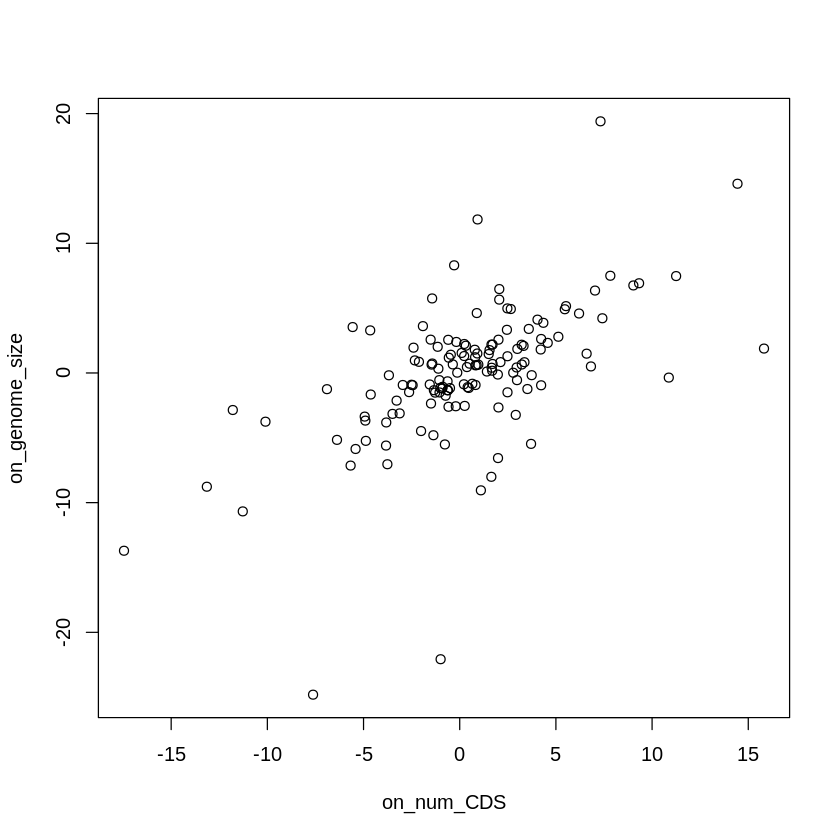

In [9]:
par(mfrow=c(1,1))
crunchTab <- caic.table(fit3)
plot(on_genome_size ~ on_intron_per_kb + on_num_CDS, crunchTab)

In [10]:
summary(fit3)


Call:
lm(on_genome_size ~ on_intron_per_kb + on_num_CDS - 1, data = contrData)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4994  -1.0269   0.2789   1.8695  14.9600 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
on_intron_per_kb -0.23109    0.10980  -2.105   0.0371 *  
on_num_CDS        0.67099    0.07542   8.897 2.76e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.104 on 139 degrees of freedom
Multiple R-squared:  0.365,	Adjusted R-squared:  0.3559 
F-statistic: 39.95 on 2 and 139 DF,  p-value: 1.961e-14


In [11]:
# correlation tests
cor.test(crunchTab$on_genome_size, crunchTab$on_intron_per_kb, method='spearman')
cor.test(crunchTab$on_genome_size, crunchTab$on_num_CDS, method='spearman')


	Spearman's rank correlation rho

data:  crunchTab$on_genome_size and crunchTab$on_intron_per_kb
S = 438172, p-value = 0.4641
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0620917 



	Spearman's rank correlation rho

data:  crunchTab$on_genome_size and crunchTab$on_num_CDS
S = 197520, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5772079 
